In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

**Link**: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
- 1 'Below College'
- 2 'College'
- 3 'Bachelor'
- 4 'Master'
- 5 'Doctor'

EnvironmentSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

JobInvolvement
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

JobSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

PerformanceRating
- 1 'Low'
- 2 'Good'
- 3 'Excellent'
- 4 'Outstanding'

RelationshipSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

WorkLifeBalance
- 1 'Bad'
- 2 'Good'
- 3 'Better'
- 4 'Best'

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df["Attrition"].value_counts()["No"]

1233

- Number employee attrition in this data is not balanced, we cannot use accuracy score as our performance metrics.
- By age, male and female have similar distribution. Most of employee in company is around 25 - 45 years old.
- From scale 1 to 5, many employees give 3 or 4 as their job satisfaction score while the rest choose 1 or 2. There is no single employee that give 5 score as their job satisfaction score. The interseting part is only male who give 1 as their job satisfaction score.
- If we take look by monthly income, male and female employees have the same distribution but female have a longer range. Based on this data, monthly income not give any information about the job satisfaction because male or female have same distribution, maybe there are some area or variable where male employees not satisfied.
- Number male employees for aech departement is more than number female employees especially in Research and Development Departement.
- Based on education, number employee attrition is high in number 3, which is bachelor. The high number is balance with total number employee who had bachelor degree. Most of employees from the company have bachelor degree and followed by master degree. But if we look by percentage for each education, employees who only high scool degree have the highest attrition percentage nd followed by bachelor.
- R&D department have the lowest average income compare to other departments. But we have to consider about the number of employee from each deparments, R&D department have many employees so the income from this department will have a longer range.
- If we compare by attrition status for each department, it seems employee who have attrition status yes tend to have lower average income.
- By average income, employee who have job role as Managerhave the highest average income followed by Research Director. These two have large gap if we compare to other job role like Healthcare Representative or Sales Executive.

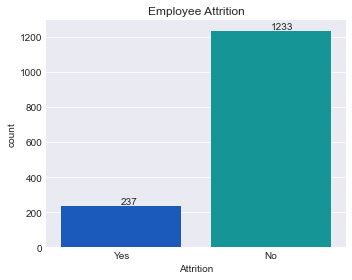

In [6]:
plt.figure(figsize = (5, 4))
sns.countplot(df["Attrition"], palette = "winter")
plt.annotate(s = str(df["Attrition"].value_counts()["No"]), xy = (1, df["Attrition"].value_counts()["No"] + 10))
plt.annotate(s = str(df["Attrition"].value_counts()["Yes"]), xy = (0, df["Attrition"].value_counts()["Yes"] + 10))
plt.title("Employee Attrition")
plt.tight_layout()
plt.show()

**AGE AND GENDER DISTRIBUTION**

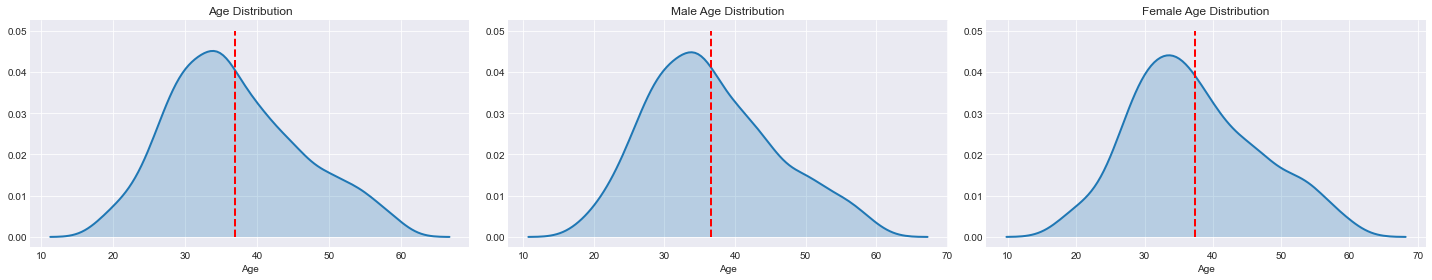

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))
sns.distplot(df["Age"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0])
sns.distplot(df[df["Gender"] == "Male"]["Age"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[1])
sns.distplot(df[df["Gender"] == "Female"]["Age"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[2])
ax[0].plot([df["Age"].mean(), df["Age"].mean()], [0, 0.05], lw = 2, color = "red", ls = "--")
ax[1].plot([df[df["Gender"] == "Male"]["Age"].mean(), df[df["Gender"] == "Male"]["Age"].mean()], [0, 0.05], lw = 2, color = "red", ls = "--")
ax[2].plot([df[df["Gender"] == "Female"]["Age"].mean(), df[df["Gender"] == "Female"]["Age"].mean()], [0, 0.05], lw = 2, color = "red", ls = "--")
ax[0].set_title("Age Distribution")
ax[1].set_title("Male Age Distribution")
ax[2].set_title("Female Age Distribution")
plt.tight_layout()
plt.show()

**JOB SATISFACTION DISTRIBUTION**

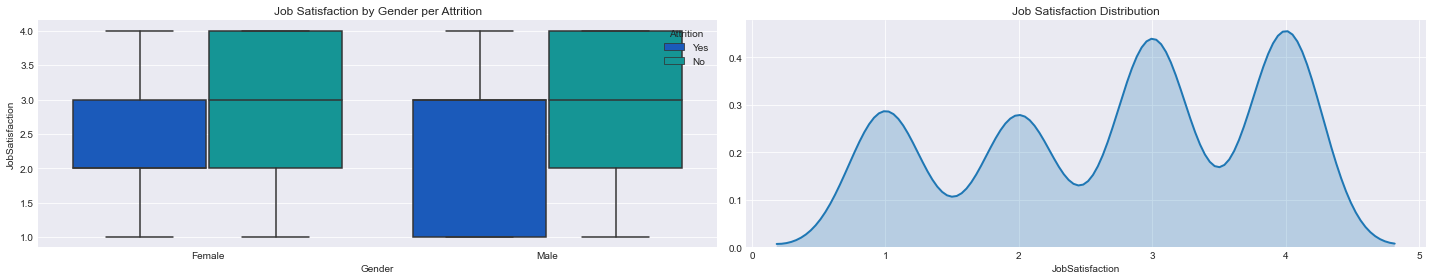

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.boxplot(x = "Gender", y = "JobSatisfaction", hue = "Attrition", palette = "winter", data = df, ax = ax[0])
sns.distplot(df["JobSatisfaction"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[1])
ax[0].set_title("Job Satisfaction by Gender per Attrition")
ax[1].set_title("Job Satisfaction Distribution")
plt.tight_layout()
plt.show()

**MONTHLY INCOME**

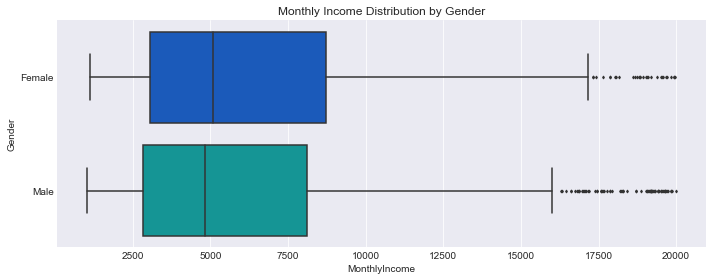

In [9]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = "MonthlyIncome", y = "Gender", palette = "winter", data = df, fliersize = 2)
plt.title("Monthly Income Distribution by Gender")
plt.tight_layout()
plt.show()

**AVERAGE INCOME AND PRESENCE PER DEPARTEMENT**

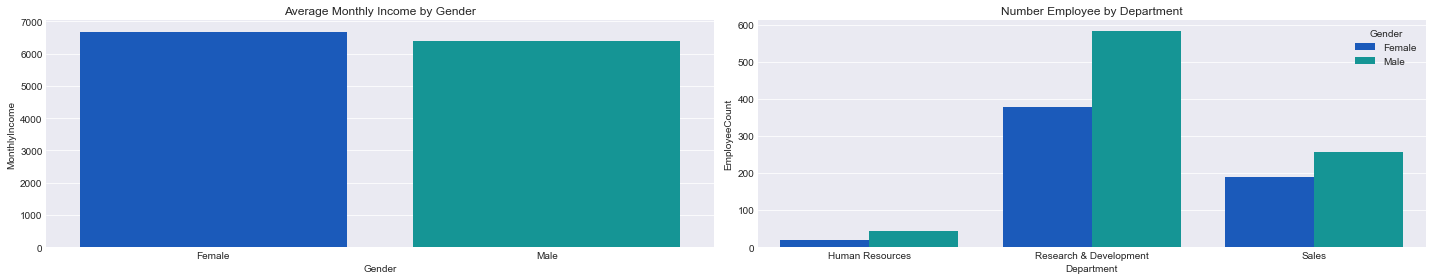

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.barplot(x = "Gender", y = "MonthlyIncome", ci = 0, palette = "winter", data = df, ax = ax[0])
sns.barplot(x = "Department", y = "EmployeeCount", hue = "Gender", ci = 0, palette = "winter", data = df.groupby(["Department", "Gender"]).sum().reset_index(), ax = ax[1])
ax[0].set_title("Average Monthly Income by Gender")
ax[1].set_title("Number Employee by Department")
plt.tight_layout()
plt.show()

**UNDERSTANDING GENERATIONAL BEHAVIOR**

In [11]:
df["AgeStatus"] = df["Age"].map(lambda x: "Millenials" if x <= 20 else "Generation X" if x <= 40 else "Boomers")

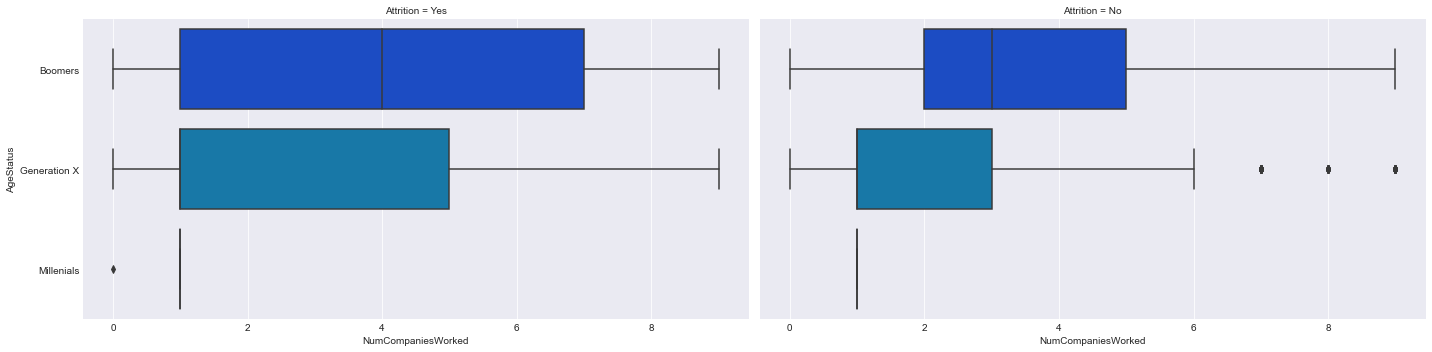

In [12]:
sns.catplot(x = "NumCompaniesWorked", y = "AgeStatus", col = "Attrition", palette = "winter", data = df, kind = "box", height = 5, aspect = 2)
plt.tight_layout()
plt.show()

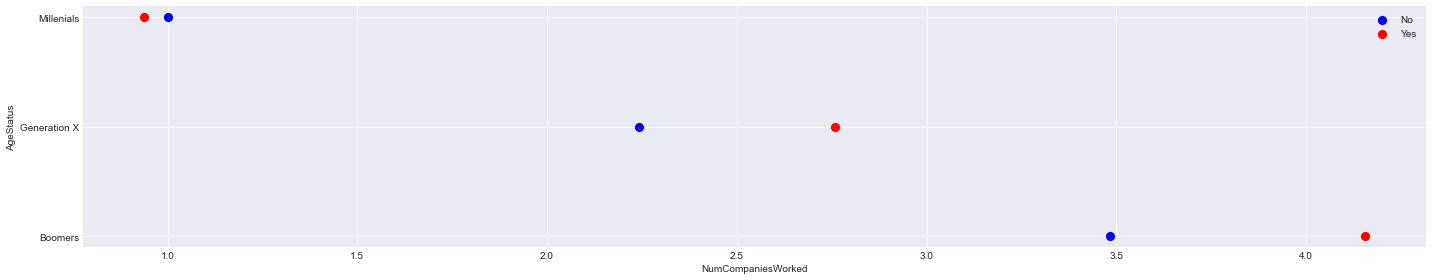

In [13]:
plt.figure(figsize = (20, 4))
sns.scatterplot(x = "NumCompaniesWorked", y = "AgeStatus", data = df[df["Attrition"] == "No"].groupby("AgeStatus").mean().reset_index(), label = "No", color = "blue", s = 100)
sns.scatterplot(x = "NumCompaniesWorked", y = "AgeStatus", data = df[df["Attrition"] == "Yes"].groupby("AgeStatus").mean().reset_index(), label = "Yes", color = "red", s = 100)
plt.tight_layout()
plt.show()

**ATTRITION BY EDUCATION LEVEL**

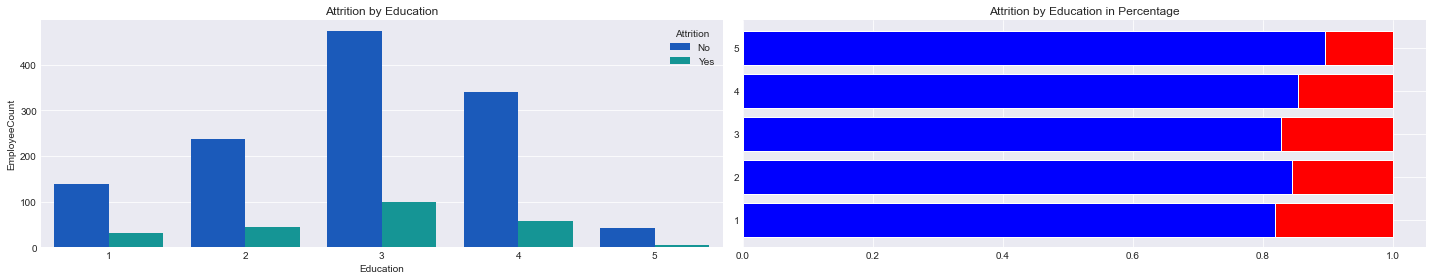

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.barplot(x = "Education", y = "EmployeeCount", hue = "Attrition", ci = 0, data = df.groupby(["Attrition", "Education"]).sum().reset_index(), palette = "winter", ax = ax[0])
for i in range(1, 6):
    ax[1].barh([i], df[df["Education"] == i]["Attrition"].value_counts(normalize = True)[0],
             color = "blue", edgecolor='white')
    ax[1].barh([i], df[df["Education"] == i]["Attrition"].value_counts(normalize = True)[1],
             left = 1 - df[df["Education"] == i]["Attrition"].value_counts(normalize = True)[1],
             color = 'red', edgecolor='white') 
ax[0].set_title("Attrition by Education")
ax[1].set_title("Attrition by Education in Percentage")
plt.tight_layout()
plt.show()

**AVERAGE INCOME BY DEPARTMENT**

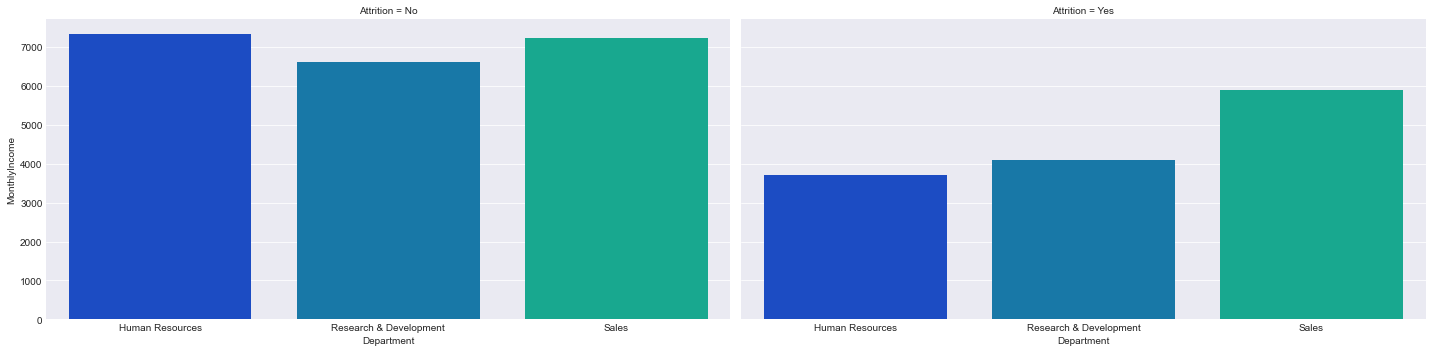

In [15]:
sns.catplot(x = "Department", y = "MonthlyIncome", col = "Attrition",
            data = df.groupby(["Department", "Attrition"]).mean().reset_index(), kind = "bar", height = 5, aspect = 2, palette = "winter")
plt.tight_layout()
plt.show()

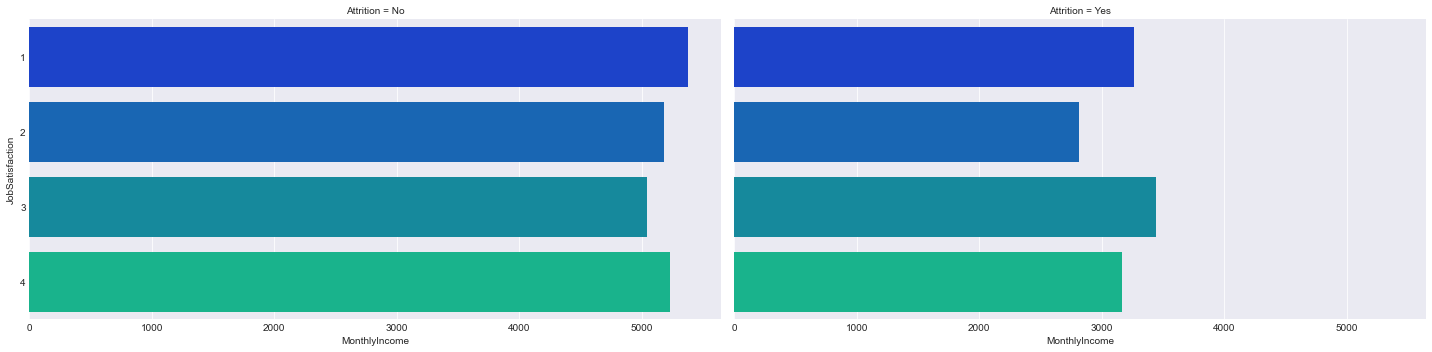

In [16]:
sns.catplot(x = "MonthlyIncome", y = "JobSatisfaction", col = "Attrition",
            data = df.groupby(["JobSatisfaction", "Attrition"]).median().reset_index(),
            kind = "bar", height = 5, aspect = 2, orient = "h", palette = "winter")
plt.tight_layout()
plt.show()

**INCOME AND THE LEVEL OF ATTRITION**

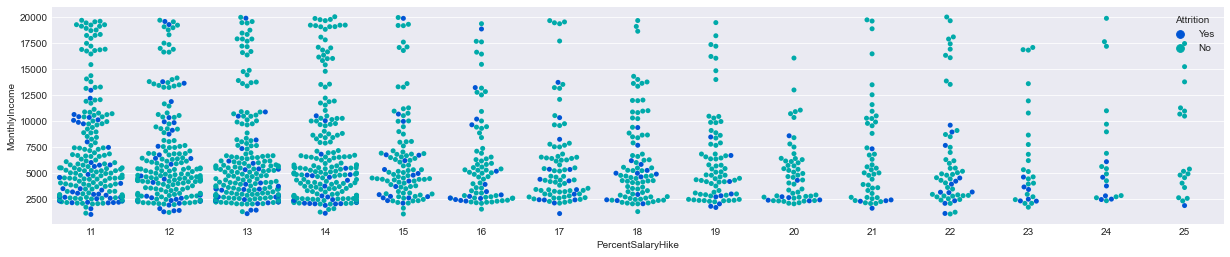

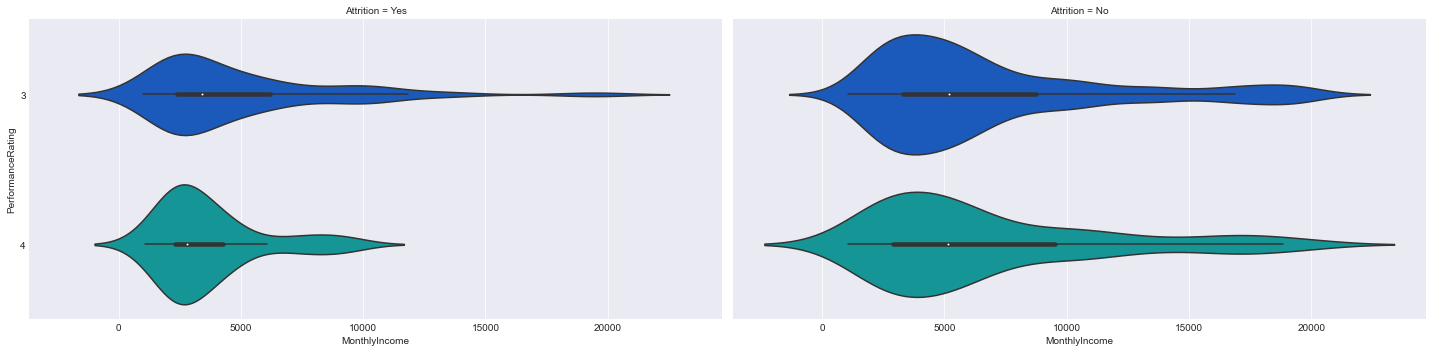

In [17]:
plt.figure(figsize = (21, 4))
sns.swarmplot(x = "PercentSalaryHike", y = "MonthlyIncome", data = df, hue = "Attrition", palette = "winter")
sns.catplot(x = "MonthlyIncome", y = "PerformanceRating", col = "Attrition",
            data = df, kind = "violin", height = 5, aspect = 2, orient = "h", palette = "winter")
plt.tight_layout()
plt.show()
fig.savefig('data_IBM_HR.png')

**AVERAGE AND PERCENT DIFFERENCE OF DAILY RATES**

In [18]:
data_graph = df.groupby(["JobRole", "Attrition"])["DailyRate"].mean().reset_index().pivot_table(index = "JobRole", values = "DailyRate", columns = "Attrition").reset_index()
data_graph["DailyDiff"] = (data_graph["No"] - data_graph["Yes"]) / data_graph["No"] * 100

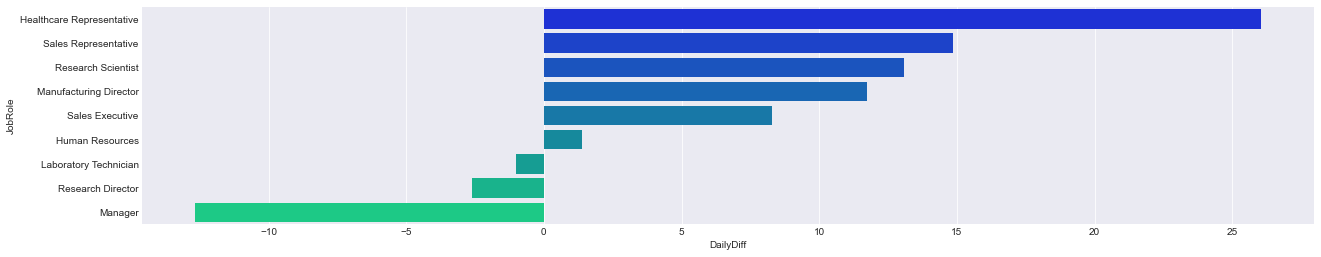

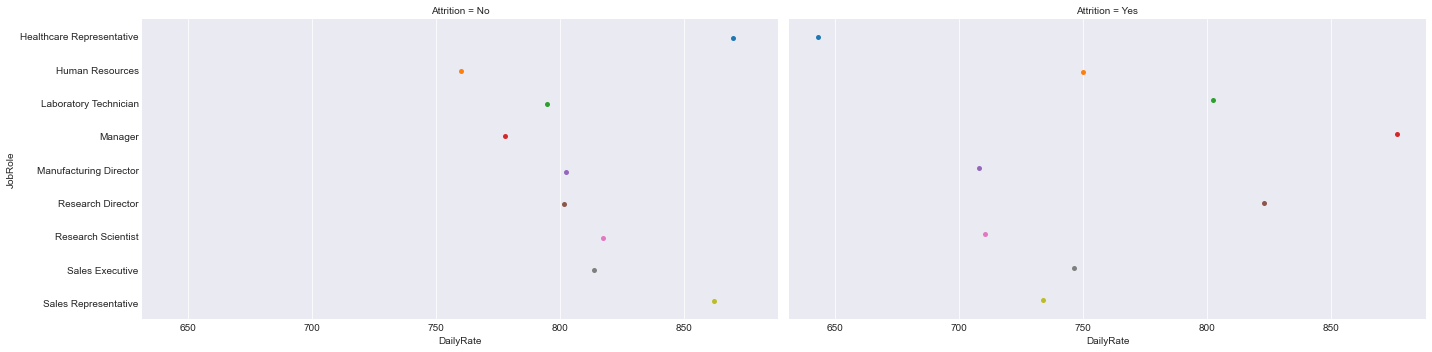

In [19]:
plt.figure(figsize = (21, 4))
sns.barplot(x = "DailyDiff", y = "JobRole", data = data_graph.sort_values("DailyDiff", ascending = False), orient = "h", palette = "winter")
sns.catplot(x = "DailyRate", y = "JobRole", col = "Attrition",
            data = df.groupby(["JobRole", "Attrition"]).mean().reset_index(),
            height = 5, aspect = 2, orient = "h")
plt.tight_layout()
plt.show()

**LEVEL OF ATTRITION BY OVERTIME STATUS**

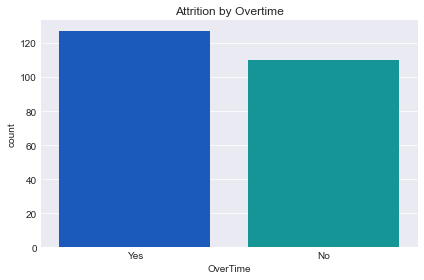

In [20]:
sns.countplot(x = "OverTime", data = df[df["Attrition"] == "Yes"], palette = "winter")
plt.title("Attrition by Overtime")
plt.tight_layout()
plt.show()

**AVERAGE AND MEDIAN INCOME BY JOB ROLE**

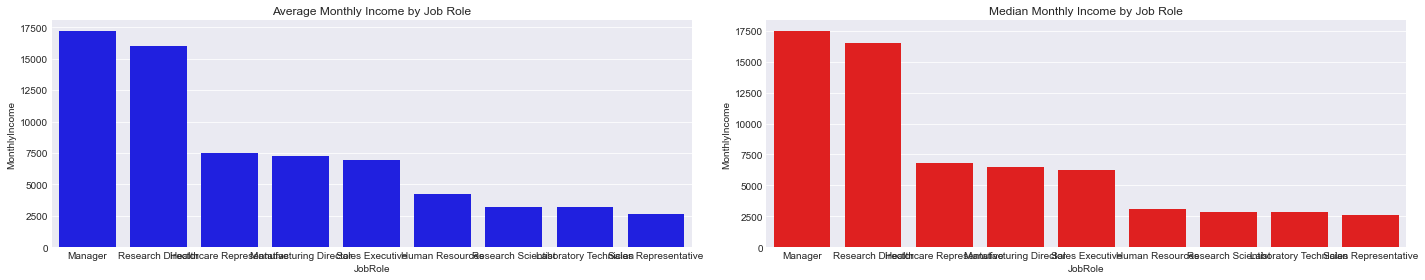

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.barplot(x = "JobRole", y = "MonthlyIncome",
            data = df.groupby("JobRole").mean().reset_index().sort_values("MonthlyIncome", ascending = False), color = "blue", ax = ax[0])
sns.barplot(x = "JobRole", y = "MonthlyIncome",
            data = df.groupby("JobRole").median().reset_index().sort_values("MonthlyIncome", ascending = False), color = "red", ax = ax[1])
ax[0].set_title("Average Monthly Income by Job Role")
ax[1].set_title("Median Monthly Income by Job Role")
plt.tight_layout()
plt.show()

**ATTRITION BY JOB ROLE**

In [22]:
df[df["JobRole"] == "Manager"]["Attrition"].value_counts(normalize = True)

No     0.95098
Yes    0.04902
Name: Attrition, dtype: float64

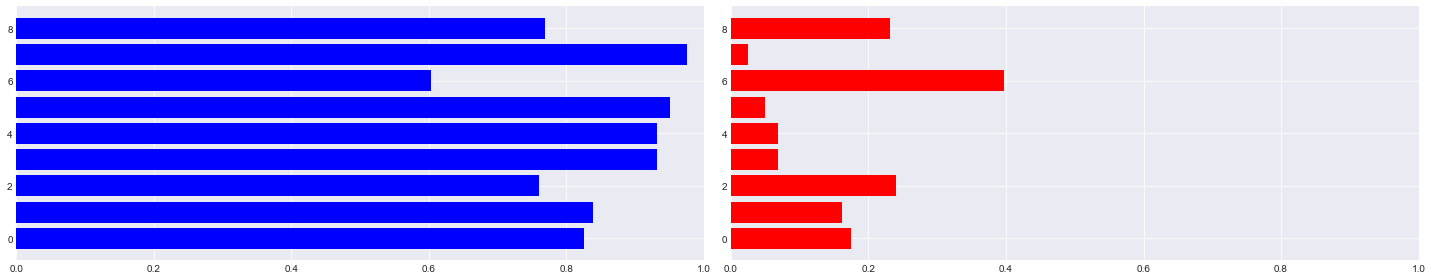

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
for i in range(9):
    ax[0].barh([i], df[df["JobRole"] == df["JobRole"].unique()[i]]["Attrition"].value_counts(normalize = True)[0], color = "blue")
    ax[1].barh([i], df[df["JobRole"] == df["JobRole"].unique()[i]]["Attrition"].value_counts(normalize = True)[1], color = "red")
ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1)
plt.tight_layout()
plt.show()

**CURRENT MANAGER AND AVERAGE SATISFACTION SCORE**

In [24]:
df["LongCurrentManager"] = df["YearsWithCurrManager"].map(lambda x: "Recently Hired" if x < 2 else "2-4 Years Hired" if x <= 4 else "Established")

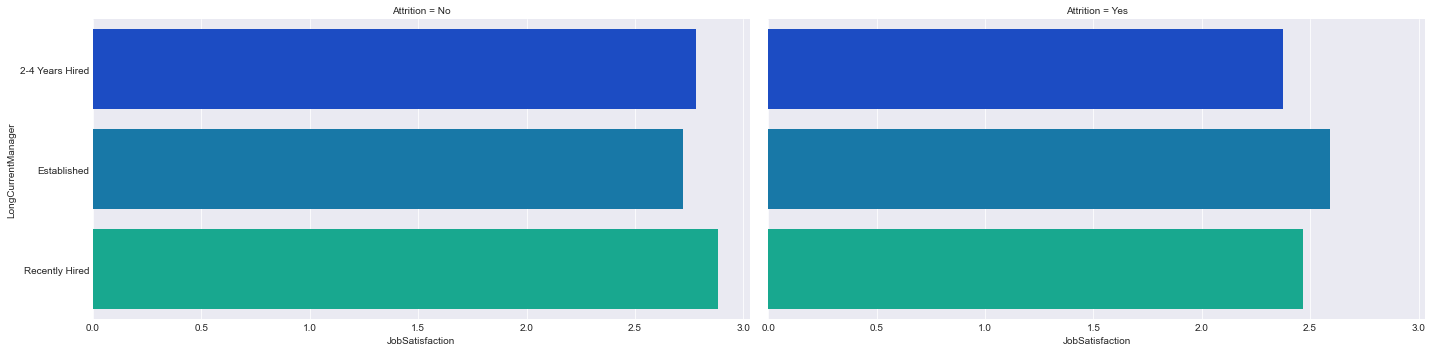

In [25]:
sns.catplot(x = "JobSatisfaction", y = "LongCurrentManager",
            col = "Attrition", data = df.groupby(["LongCurrentManager", "Attrition"]).mean().reset_index(),
            kind = "bar", height = 5, aspect = 2, orient = "h", palette = "winter")
plt.tight_layout()
plt.show()

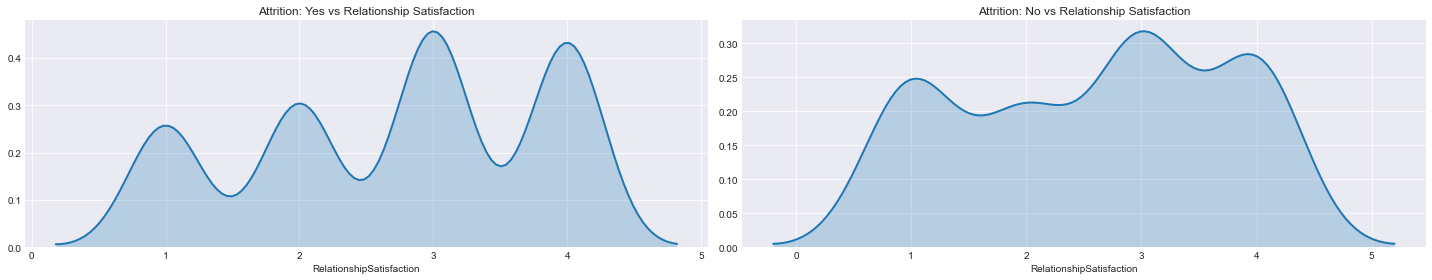

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.distplot(df[df["Attrition"] == "No"]["RelationshipSatisfaction"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0])
sns.distplot(df[df["Attrition"] == "Yes"]["RelationshipSatisfaction"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[1])
ax[0].set_title("Attrition: Yes vs Relationship Satisfaction")
ax[1].set_title("Attrition: No vs Relationship Satisfaction")
plt.tight_layout()
plt.show()

**AVERAGE ENVIRONMENT SATISFACTION**

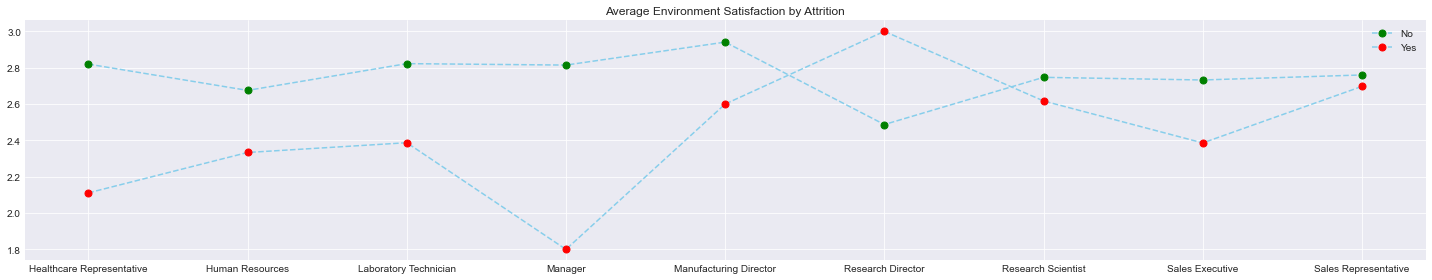

In [27]:
plt.figure(figsize = (20, 4))
plt.plot(df[df["Attrition"] == "No"].groupby("JobRole").mean()["EnvironmentSatisfaction"].index,
         df[df["Attrition"] == "No"].groupby("JobRole").mean()["EnvironmentSatisfaction"], marker = "o", mec = "green", mfc = "green", ms = 7, color = "skyblue", ls = "--", label = "No")
plt.plot(df[df["Attrition"] == "Yes"].groupby("JobRole").mean()["EnvironmentSatisfaction"].index,
         df[df["Attrition"] == "Yes"].groupby("JobRole").mean()["EnvironmentSatisfaction"], marker = "o", mec = "red", mfc = "red", ms = 7, color = "skyblue", ls = "--", label = "Yes")
plt.legend()
plt.title("Average Environment Satisfaction by Attrition")
plt.tight_layout()
plt.show()

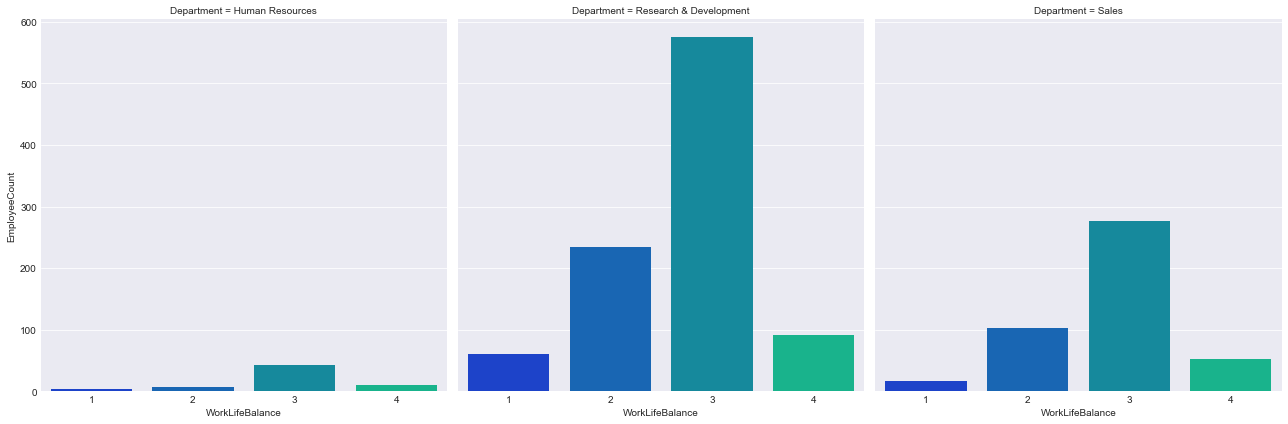

In [28]:
sns.catplot(x = "WorkLifeBalance", y = "EmployeeCount", col = "Department",
            data = df.groupby(["Department", "WorkLifeBalance"]).sum().reset_index(), kind = "bar", height = 6, aspect = 1, palette = "winter")
plt.tight_layout()
plt.show()

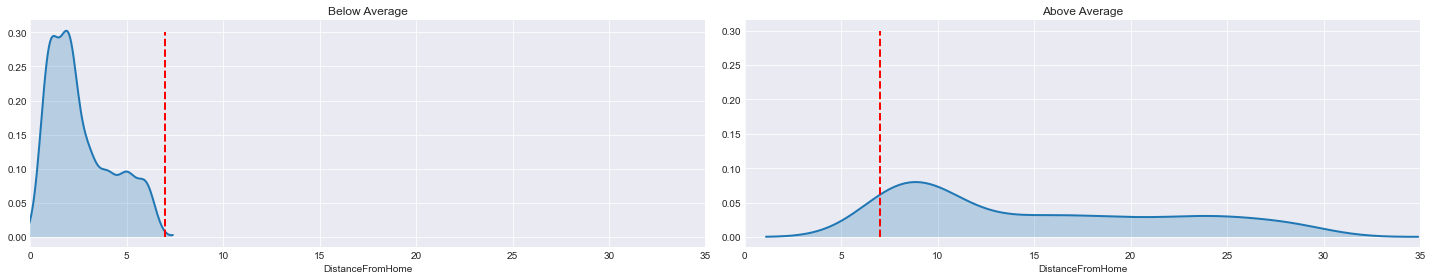

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
sns.distplot(df[df["DistanceFromHome"] < 7]["DistanceFromHome"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[0])
sns.distplot(df[df["DistanceFromHome"] >= 7]["DistanceFromHome"], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[1])
ax[0].plot([df["DistanceFromHome"].median(), df["DistanceFromHome"].median()], [0, 0.3], lw = 2, color = "red", ls = "--")
ax[1].plot([df["DistanceFromHome"].median(), df["DistanceFromHome"].median()], [0, 0.3], lw = 2, color = "red", ls = "--")
ax[0].set_title("Below Average")
ax[1].set_title("Above Average")
ax[0].set_xlim(0, 35)
ax[1].set_xlim(0, 35)
plt.tight_layout()
plt.show()

In [30]:
df["DistanceStatus"] = df["DistanceFromHome"].map(lambda x: "Above Average" if x >= 7 else "Below Average")

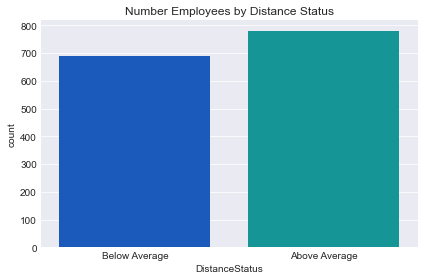

In [31]:
sns.countplot(df["DistanceStatus"], palette = "winter")
plt.title("Number Employees by Distance Status")
plt.tight_layout()
plt.show()

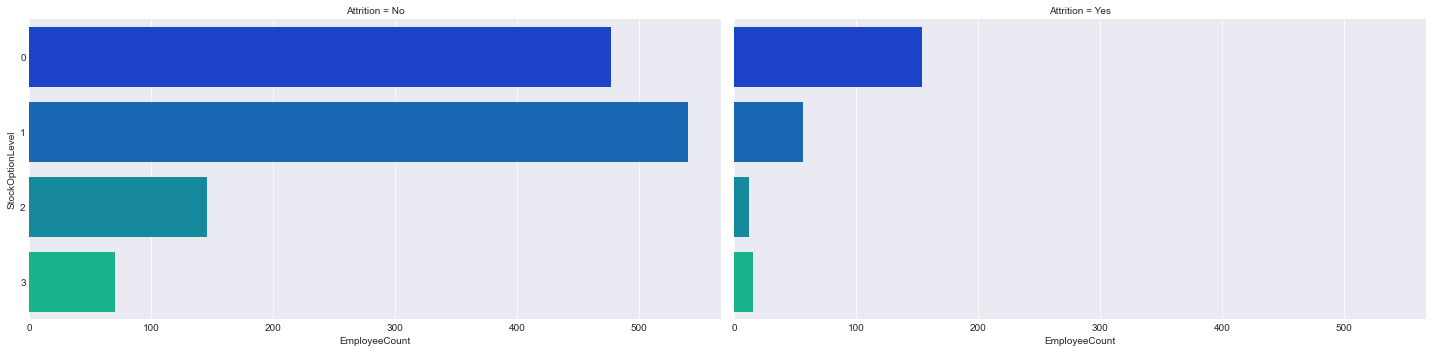

In [32]:
sns.catplot(x = "EmployeeCount", y = "StockOptionLevel", col = "Attrition",
            data = df.groupby(["StockOptionLevel", "Attrition"]).sum().reset_index(),
            kind = "bar", height = 5, aspect = 2, orient = "h", palette = "winter")
plt.tight_layout()
plt.show()

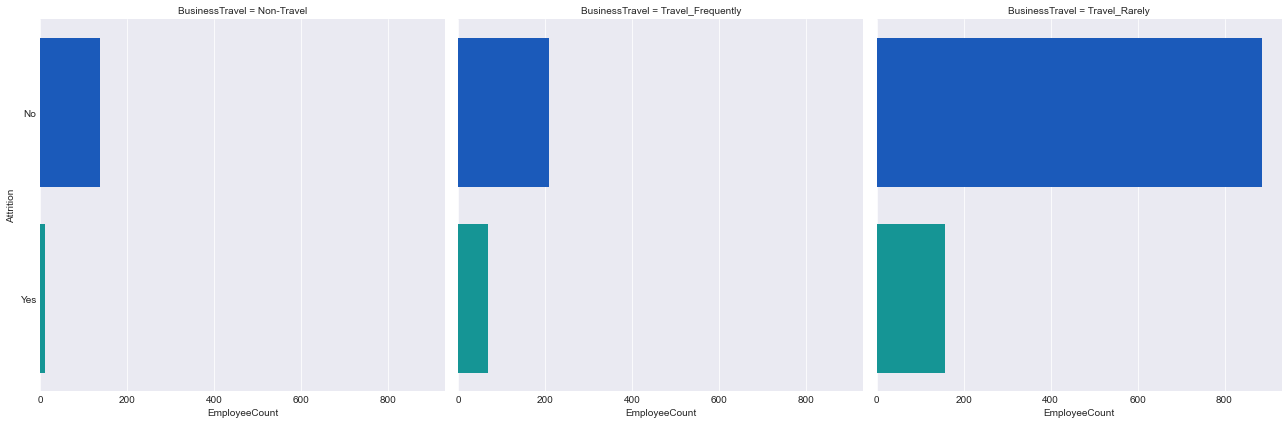

In [33]:
sns.catplot(x = "EmployeeCount", y = "Attrition", col = "BusinessTravel", data = df.groupby(["Attrition", "BusinessTravel"]).sum().reset_index(),
            kind = "bar", height = 6, aspect = 1, palette = "winter")
plt.tight_layout()
plt.show()

**CORRELATION MATRIX**

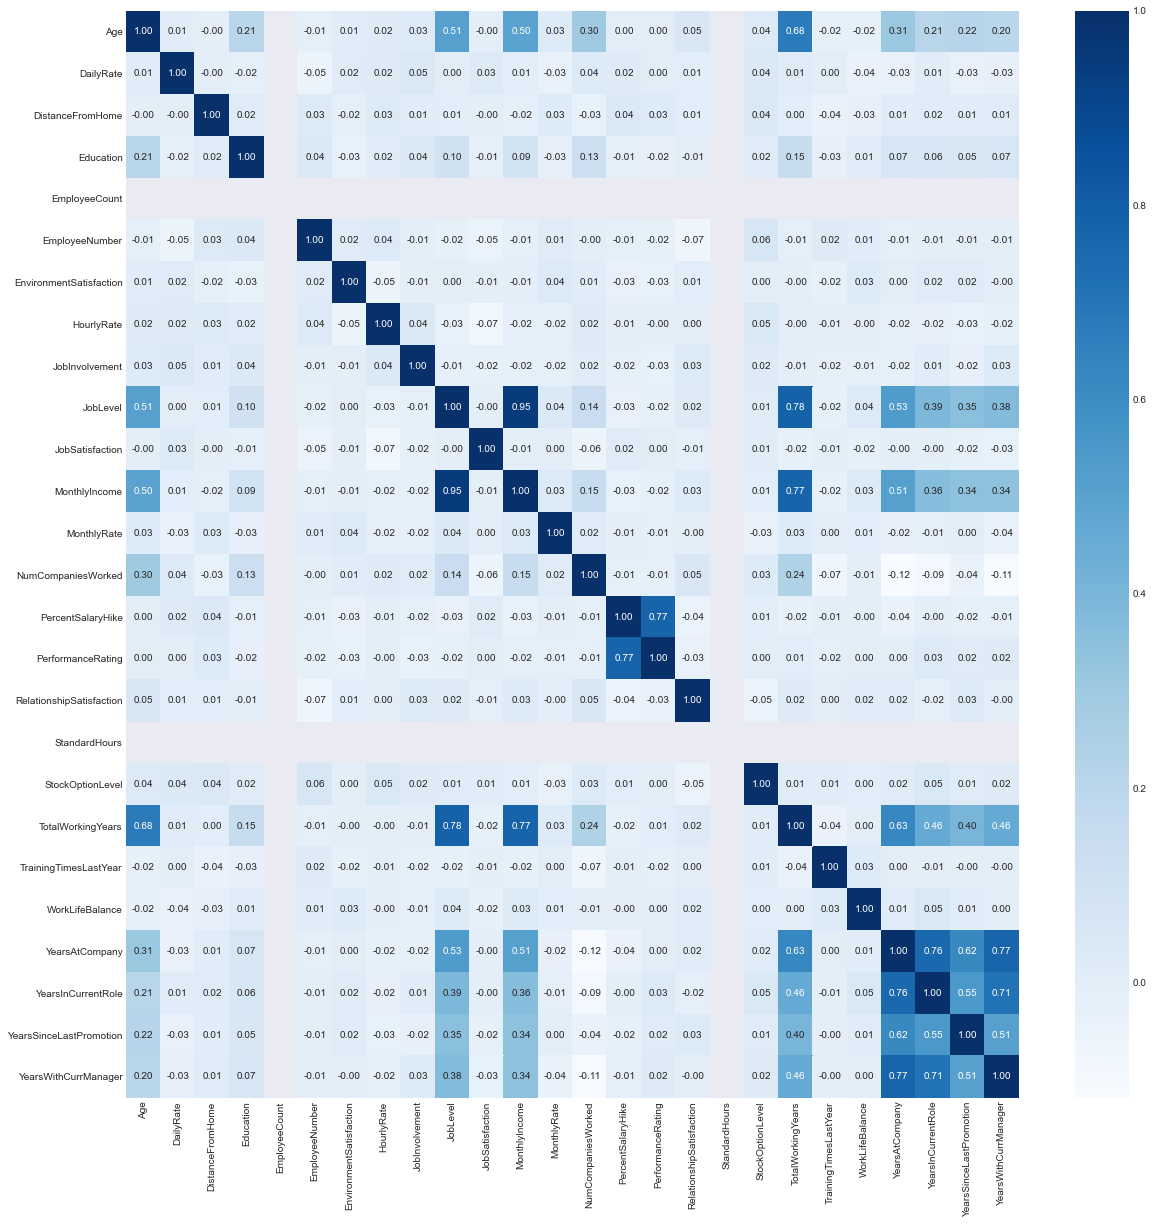

In [34]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

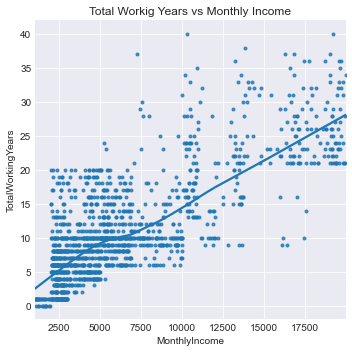

In [35]:
sns.lmplot(x = "MonthlyIncome", y = "TotalWorkingYears", data = df, markers = '.', lowess = True)
plt.title("Total Workig Years vs Monthly Income")
plt.tight_layout()
plt.show()

---
## **2. PREPARE THE DATA**
---

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df = df.drop(["AgeStatus", "LongCurrentManager", "DistanceStatus"], axis = 1)

In [38]:
columns = df.select_dtypes(include = "object").columns
for col in columns:
    new_data = pd.DataFrame(pd.get_dummies(df[col], drop_first = True, prefix = col))
    df = pd.concat([df, new_data], axis = 1)
    df = df.drop(col, axis = 1)

In [39]:
X = df.drop(["Attrition_Yes", "EmployeeNumber"], axis = 1)
y = df["Attrition_Yes"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

In [43]:
# Algorithm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [44]:
algorithm = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [45]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [46]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-package

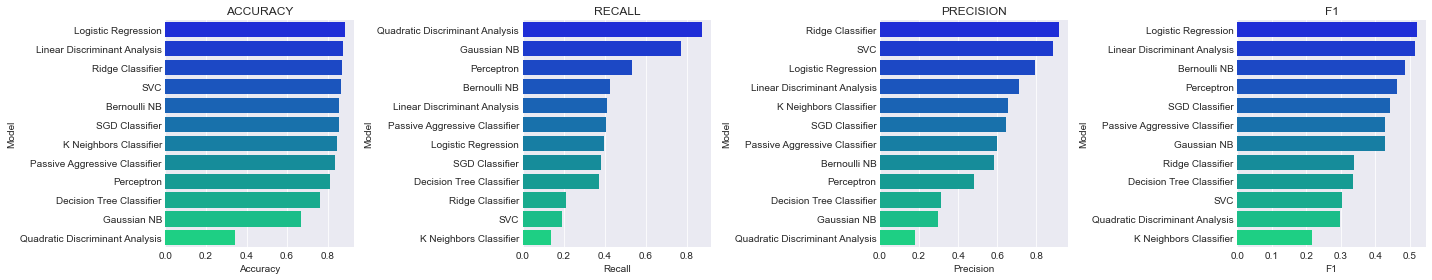

In [47]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'winter', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'winter', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'winter', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

In [48]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 1000)
parameters = {"C": np.linspace(1, 5, 10), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='recall')

In [49]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
59,0.445237,0.071365,0.002097,0.000286,5,1,"{'C': 5.0, 'l1_ratio': 1.0}",0.421053,0.473684,0.368421,...,0.502959,0.467456,0.491124,0.461538,0.494118,0.464706,0.502959,0.461538,0.478723,0.016659


In [50]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 200, C = 5, l1_ratio = 1)
model.fit(X_train, y_train)

LogisticRegression(C=5, l1_ratio=1, max_iter=200, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       988
           1       0.81      0.48      0.60       188

    accuracy                           0.90      1176
   macro avg       0.86      0.73      0.77      1176
weighted avg       0.89      0.90      0.89      1176



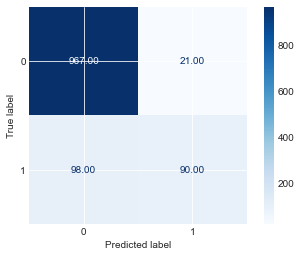

In [51]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**RIDGE**

In [52]:
model = RidgeClassifier()
parameters = {"alpha": np.linspace(1, 10, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             return_train_score=True, scoring='recall')

In [53]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006689,0.00064,0.002709,0.000653,1,{'alpha': 1.0},0.157895,0.315789,0.052632,0.210526,...,0.242604,0.236686,0.254438,0.248521,0.229412,0.229412,0.254438,0.230769,0.239965,0.009158


In [54]:
model = RidgeClassifier(alpha = 1)
model.fit(X_train, y_train)

RidgeClassifier(alpha=1)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       988
           1       0.94      0.23      0.37       188

    accuracy                           0.88      1176
   macro avg       0.90      0.62      0.65      1176
weighted avg       0.88      0.88      0.84      1176



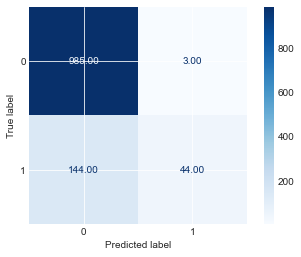

In [55]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [56]:
model = KNeighborsClassifier()
parameters = {"n_neighbors": range(2, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 11)}, return_train_score=True,
             scoring='recall')

In [57]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.025645,0.005384,0.0399,0.007132,3,{'n_neighbors': 3},0.157895,0.157895,0.105263,0.210526,...,0.402367,0.426036,0.366864,0.414201,0.411765,0.405882,0.372781,0.366864,0.398333,0.02574


In [58]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       988
           1       0.83      0.39      0.53       188

    accuracy                           0.89      1176
   macro avg       0.86      0.69      0.74      1176
weighted avg       0.88      0.89      0.87      1176



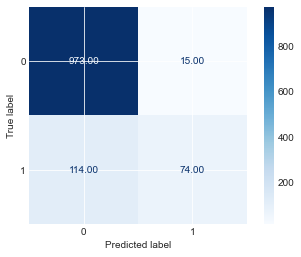

In [59]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SGD**

In [60]:
model = SGDClassifier(penalty = "elasticnet")
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1], "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(penalty='elasticnet'),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='recall')

In [61]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.046879,0.008746,0.002738,0.000597,0.0001,0.6,"{'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}",0.631579,0.789474,0.210526,...,0.449704,0.656805,0.337278,0.349112,0.6,0.270588,0.390533,0.639053,0.517828,0.1694


In [62]:
model = SGDClassifier(penalty = "elasticnet", alpha = 0.0001, l1_ratio = 0.4)
model.fit(X_train, y_train)

SGDClassifier(l1_ratio=0.4, penalty='elasticnet')

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       988
           1       0.77      0.49      0.60       188

    accuracy                           0.89      1176
   macro avg       0.84      0.73      0.77      1176
weighted avg       0.89      0.89      0.88      1176



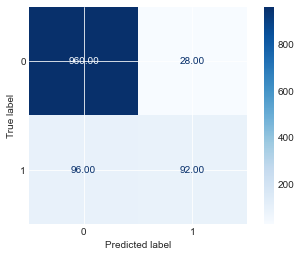

In [63]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PERCEPTRON**

In [64]:
model = Perceptron()
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1]}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='recall')

In [65]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008577,0.001558,0.003189,0.000593,0.0001,{'alpha': 0.0001},0.473684,0.789474,0.105263,0.684211,...,0.426036,0.556213,0.43787,0.236686,0.605882,0.576471,0.704142,0.786982,0.559655,0.153171


In [66]:
model = Perceptron(alpha = 0.0001)
model.fit(X_train, y_train)

Perceptron()

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       988
           1       0.42      0.77      0.54       188

    accuracy                           0.79      1176
   macro avg       0.68      0.78      0.70      1176
weighted avg       0.86      0.79      0.81      1176



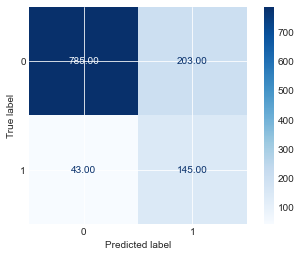

In [67]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PASSIVE AGGRESIVE**

In [68]:
model = PassiveAggressiveClassifier()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': range(1, 11)}, return_train_score=True,
             scoring='recall')

In [69]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.008404,0.002346,0.003493,0.000919,2,{'C': 2},0.526316,0.842105,0.315789,0.631579,...,0.449704,0.568047,0.810651,0.905325,0.564706,0.247059,0.39645,0.112426,0.54449,0.24335


In [70]:
model = PassiveAggressiveClassifier(C = 7)
model.fit(X_train, y_train)

PassiveAggressiveClassifier(C=7)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       988
           1       0.86      0.30      0.45       188

    accuracy                           0.88      1176
   macro avg       0.87      0.65      0.69      1176
weighted avg       0.88      0.88      0.86      1176



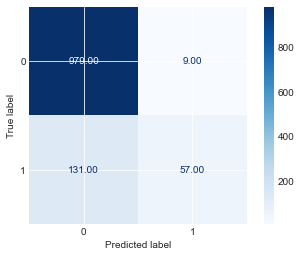

In [71]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**LDA**

In [72]:
model = LinearDiscriminantAnalysis()
parameters = {"solver": ('svd', 'lsqr', 'eigen')}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 335, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\Users\user\Anaconda3\lib\site-packages\scipy\linalg\decomp.py", line 578, in eigh
    'or eigenvectors were computed.'.format(info-n))
numpy.linalg.LinAlgError: The leading minor of order 5 of B is not positive definite. The factorization of B could not be comple

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ('svd', 'lsqr', 'eigen')},
             return_train_score=True, scoring='recall')

In [73]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.017191,0.002097,0.003476,0.000809,lsqr,{'solver': 'lsqr'},0.421053,0.421053,0.263158,0.526316,...,0.497041,0.443787,0.497041,0.449704,0.482353,0.476471,0.491124,0.455621,0.470439,0.019546


In [74]:
model = LinearDiscriminantAnalysis(solver = "lsqr")
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       988
           1       0.79      0.47      0.59       188

    accuracy                           0.89      1176
   macro avg       0.85      0.72      0.76      1176
weighted avg       0.89      0.89      0.88      1176



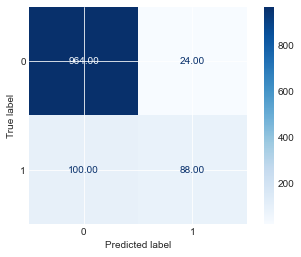

In [75]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**QDA**

In [76]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.89      0.57      0.69       988
           1       0.21      0.61      0.32       188

    accuracy                           0.58      1176
   macro avg       0.55      0.59      0.51      1176
weighted avg       0.78      0.58      0.63      1176



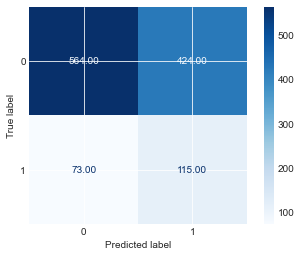

In [77]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [78]:
model = SVC()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': range(1, 11)},
             return_train_score=True, scoring='recall')

In [79]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
7,0.113536,0.007614,0.010685,0.001178,8,{'C': 8},0.368421,0.368421,0.210526,0.526316,...,0.946746,0.911243,0.91716,0.934911,0.923529,0.947059,0.940828,0.928994,0.930846,0.011257


In [80]:
model = SVC(C = 8)
model.fit(X_train, y_train)

SVC(C=8)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       988
           1       0.99      0.92      0.96       188

    accuracy                           0.99      1176
   macro avg       0.99      0.96      0.97      1176
weighted avg       0.99      0.99      0.99      1176



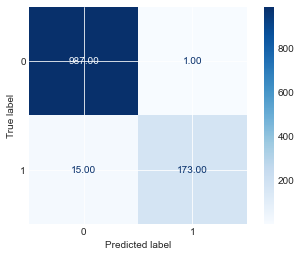

In [81]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [82]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       988
           1       0.30      0.78      0.43       188

    accuracy                           0.67      1176
   macro avg       0.62      0.72      0.60      1176
weighted avg       0.84      0.67      0.72      1176



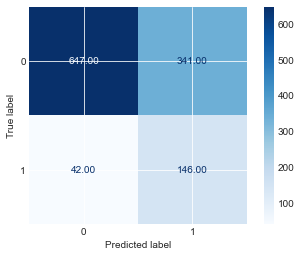

In [83]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**BERNOULLI NB**

In [84]:
model = BernoulliNB()
parameters = {"alpha": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='recall')

In [85]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005374,0.000799,0.0031,0.000541,0.1,{'alpha': 0.1},0.368421,0.368421,0.421053,0.578947,...,0.502959,0.467456,0.491124,0.502959,0.488235,0.5,0.455621,0.47929,0.488173,0.015201


In [86]:
model = BernoulliNB(alpha = 0.1)
model.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       988
           1       0.60      0.48      0.54       188

    accuracy                           0.87      1176
   macro avg       0.75      0.71      0.73      1176
weighted avg       0.86      0.87      0.86      1176



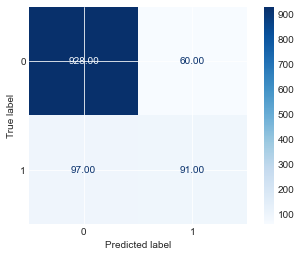

In [87]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [88]:
model = DecisionTreeClassifier()
parameters = {"max_depth": range(2, 6), "min_samples_split": range(2, 6), "min_samples_leaf": range(2, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 6),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(2, 6)},
             return_train_score=True, scoring='recall')

In [89]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
57,0.012418,0.000479,0.002196,0.000401,5,4,3,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.210526,0.157895,...,0.47929,0.47929,0.467456,0.39645,0.5,0.529412,0.485207,0.47929,0.468622,0.040888


In [90]:
model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       988
           1       0.71      0.46      0.56       188

    accuracy                           0.88      1176
   macro avg       0.81      0.71      0.74      1176
weighted avg       0.87      0.88      0.87      1176



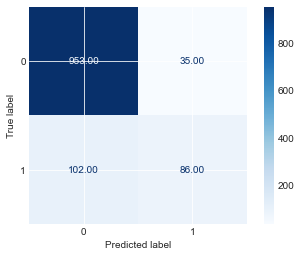

In [91]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [92]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 500, C = 5, l1_ratio = 1),
    'Ridge Classifier': RidgeClassifier(alpha = 1),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 3),
    'SGD Classifier': SGDClassifier(penalty = "elasticnet", alpha = 0.0001, l1_ratio = 0.4),
    'Perceptron': Perceptron(alpha = 0.0001),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(C = 7),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver = "lsqr"),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(C = 8),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(alpha = 0.1),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)
}

In [93]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [94]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-package

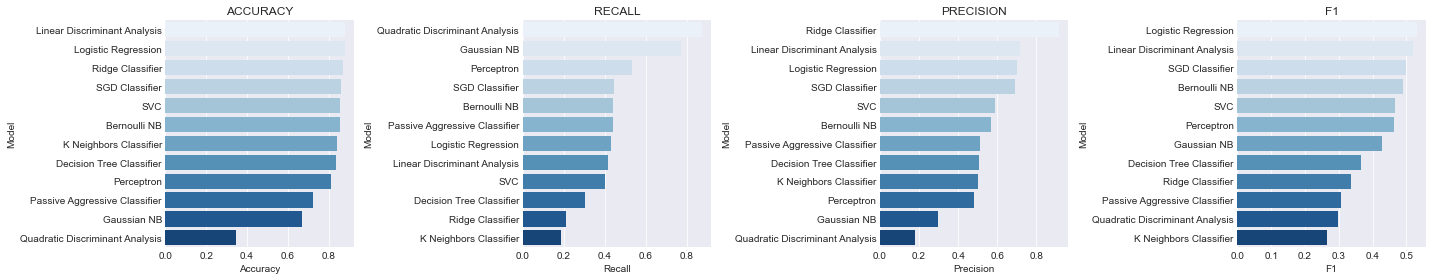

In [95]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'Blues', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'Blues', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'Blues', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'Blues', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

In [96]:
results

,Model,Accuracy,Accuracy Std,Precision,Precision Std,Recall,Recall Std,F1,F1 Std
0,Logistic Regression,0.8776,0.0187,0.7025,0.1053,0.4310,0.0500,0.5302,0.0528
1,Ridge Classifier,0.8699,0.0112,0.9183,0.1018,0.2132,0.0719,0.3372,0.0983
2,K Neighbors Classifier,0.8393,0.0182,0.5024,0.1572,0.1860,0.0748,0.2650,0.0945
3,SGD Classifier,0.8623,0.0331,0.6887,0.1931,0.4459,0.1519,0.4997,0.0865
4,Perceptron,0.8119,0.0568,0.4813,0.2028,0.5327,0.2047,0.4644,0.1266
5,Passive Aggressive Classifier,0.7244,0.1907,0.5100,0.3594,0.4406,0.3525,0.3068,0.1270
6,Linear Discriminant Analysis,0.8784,0.0197,0.7150,0.1357,0.4149,0.0734,0.5206,0.0793
7,Quadratic Discriminant Analysis,0.3443,0.0392,0.1797,0.0245,0.8737,0.1376,0.2980,0.0414
8,SVC,0.8554,0.0251,0.5894,0.1494,0.4029,0.1173,0.4657,0.1014
9,Gaussian NB,0.6668,0.0553,0.2966,0.0436,0.7728,0.0959,0.4281,0.0590


---
## **4. FINE TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION**
---

We will use voting classifier to increase our model performance.
- We choose Logistic Regression, Ridge Regression, SGD, LDA, and Bernoulli because they have the highest accuracy score
- We get train Accuracy = 0.84
- We get train Precision = 0.84
- We get train Recall = 0.88

After we run using test data
- We get test Accuracy = 0.91
- We get test Precision = 0.88
- We get test Recall = 0.97

The model have done the work very well and this model is good to use.

In [97]:
clf1 = QuadraticDiscriminantAnalysis()
clf2 = GaussianNB()
clf3 = Perceptron(alpha = 0.0001)
clf4 = BernoulliNB(alpha = 0.1)
clf5 = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 500, C = 5, l1_ratio = 1)
eclf = VotingClassifier(estimators=[("alg1", clf1), ("alg2", clf2), ("alg3", clf3), ("alg4", clf4), ("alg5", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       988
           1       0.51      0.70      0.59       188

    accuracy                           0.84      1176
   macro avg       0.72      0.79      0.75      1176
weighted avg       0.87      0.84      0.85      1176



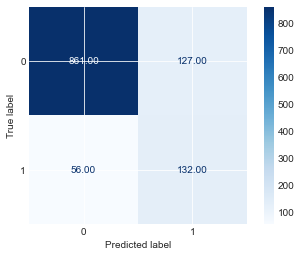

In [98]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       245
           1       0.49      0.61      0.55        49

    accuracy                           0.83       294
   macro avg       0.71      0.74      0.72       294
weighted avg       0.85      0.83      0.84       294



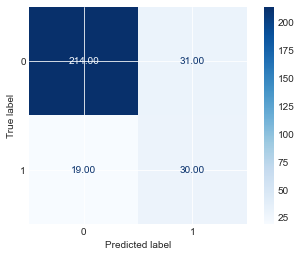

In [99]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(eclf, X_test, y_test, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()